In [1]:
import numpy as np
from scipy.stats import gengamma
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class initialize_bandits(object):
    def __init__(self, n_arms, mu = 30, sigma = 15, a = 5, c = 1):
        #Assume reward means are randomly distributed
        self.reward_means = np.random.normal(mu,sigma,size=(n_arms,))
        #Assume reward variances are inverse gamma distributed
        self.reward_var = gengamma.rvs(a, c, size=(n_arms,))
    def get_params(self):
        print "My reward means are", self.reward_means
        print "My reward variances are", self.reward_var
        

class Epsilon_learner(object):
    def __init__(self, epsilon, n_arms, step = "average"):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.value_estimate = np.zeros((n_arms,))
        self.rewards_observed = []
        if step == "average":
            self.step = "average"
            self.step_size = np.zeros((n_arms,))
            
    def greedy_choice(self):
        #If there's a tie, break tie by random choosing between them?
        p = np.random.uniform()
        if p < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return(np.argmax(self.value_estimate)) #This implementation will tend to choose the first bandit
            
    def press_lever(self, bandits, arm):
        reward =  np.random.normal(bandits.reward_means[arm], bandits.reward_var[arm]) #reward observed
        self.rewards_observed.append(reward)
        return reward
    
    def update_value_estimates(self, arm, reward):
        if self.step == "average":
            self.step_size[arm] += 1
            self.value_estimate[arm] += float(reward - self.value_estimate[arm]) / self.step_size[arm]
   

In [7]:
rewards_a = []
for agent in range(200):
    bandits = initialize_bandits(10)
    learner = Epsilon_learner(0.2, 10)
    for play in range(1000):
        arm = learner.greedy_choice()
        reward = learner.press_lever(bandits, arm)
        learner.update_value_estimates(arm, reward)
    rewards_a.append(learner.rewards_observed)
rewards_b = []
for agent in range(200):
    bandits = initialize_bandits(10)
    learner = Epsilon_learner(0.1, 10)
    for play in range(1000):
        arm = learner.greedy_choice()
        reward = learner.press_lever(bandits, arm)
        learner.update_value_estimates(arm, reward)
    rewards_b.append(learner.rewards_observed)
rewards_c = []
for agent in range(200):
    bandits = initialize_bandits(10)
    learner = Epsilon_learner(0.01, 10)
    for play in range(1000):
        arm = learner.greedy_choice()
        reward = learner.press_lever(bandits, arm)
        learner.update_value_estimates(arm, reward)
    rewards_c.append(learner.rewards_observed)

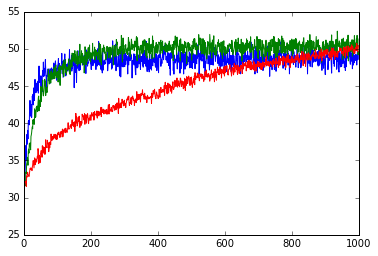

In [8]:
plt.plot(np.arange(1000), np.array(rewards_a).mean(axis=0))
plt.plot(np.arange(1000), np.array(rewards_b).mean(axis=0))
plt.plot(np.arange(1000), np.array(rewards_c).mean(axis=0))